# Common Envelope Evolution in AGN Stars 

## Accretion stream properties 
According to Cantiello et al. 2021 https://ui.adsabs.harvard.edu/abs/2021ApJ...910...94C/abstract 

T $\propto$ r$^{-3/8}$ and $\rho \propto r^{-3/2}$ and $v \propto r^{-1/2}$
 
 The Bondi radius is $2GM/c_{\rm s,agn}^2$. We want to start at the bondi radius with cs_agn and rho_agn and connect down to the surface of the agn star using these 

In [496]:
from config import *

In [497]:
IMMORTAL = '../agnstars/adam_prototype_14547/grids/cs10/RHO_3d-17/LOGS/profile20.data'
p = mr.MesaData(IMMORTAL)

In [499]:
cs_agn = 1e6
rho_agn = 3e-17
M = p.mass[0]
r_b = 2*c.G* M*c.msun / cs_agn**2.0

In [500]:
print('Bondi Radius of AGN Star (Rsun): ', r_b/c.rsun)
print('Mass of AGN Star (Msun): ', M)

Bondi Radius of AGN Star (Rsun):  2952065.1791086867
Mass of AGN Star (Msun):  773.342886953345


In [511]:
r_shock = 10**p.logR[0]*c.rsun
print('Radius of AGN Star = Shock Radius : ', r_star/c.rsun)

Radius of AGN Star = Shock Radius :  12.54426384954609


In [502]:
# Constants (assuming r_star, r_b, and c.rsun are already defined)
n = 1000
rho_agn = 3e-17  # Target density at r_b
T_star = 10**p.logT[0]

# Calculate r_stream
r_stream = np.linspace(r_star, r_b, n)
r_stream = r_stream / c.rsun  # Normalize by solar radius

# Initial rho_stream calculation
rho_stream = r_stream**(-3.0/2.0)
T_stream = r_stream**(-3.0/8.0)
v_stream = r_stream**(-1.0/2.0)

# Determine scaling factors to ensure rho_stream(r_b) = rho_agn,  T_stream(r_star) = T_star, V_stream(r_bondi) = cs_agn
scale_factor = rho_agn / rho_stream[-1]
scale_factor_T = T_star / T_stream[0] 
scale_factor_v = cs_agn / v_stream[-1]

# Apply the scaling factors
rho_stream_scaled = rho_stream * scale_factor
T_stream_scaled = T_stream * scale_factor_T
v_stream_scaled = v_stream * scale_factor_v

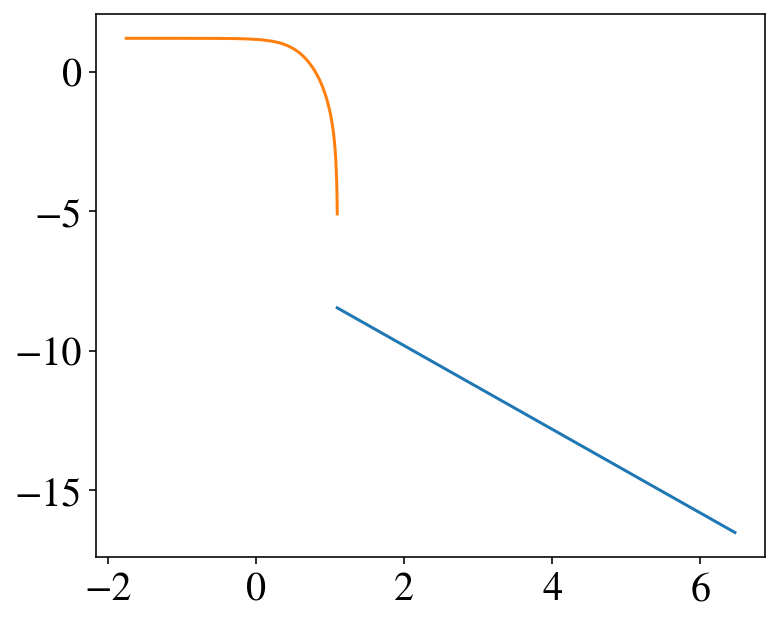

In [503]:
plt.plot(np.log10(r_stream),np.log10(rho_stream_scaled))
plt.plot(p.logR,p.logRho)
# Note that the surface of the star and the accretion stream do know match. There is a shock in between, which is basically at the stellar surface

## Concatenate arrays

In [504]:
r_star = 10**p.logR
rho_star = 10**p.logRho
T_star = 10**p.logT
v_star = [0] * len(T_star)

In [505]:
r_star_stream = np.concatenate((r_star[::-1], r_stream))
rho_star_stream = np.concatenate((rho_star[::-1], rho_stream_scaled))
T_star_stream = np.concatenate((T_star[::-1],T_stream_scaled))
v_star_stream = np.concatenate((v_star[::-1],v_stream_scaled))

7733.04719820857


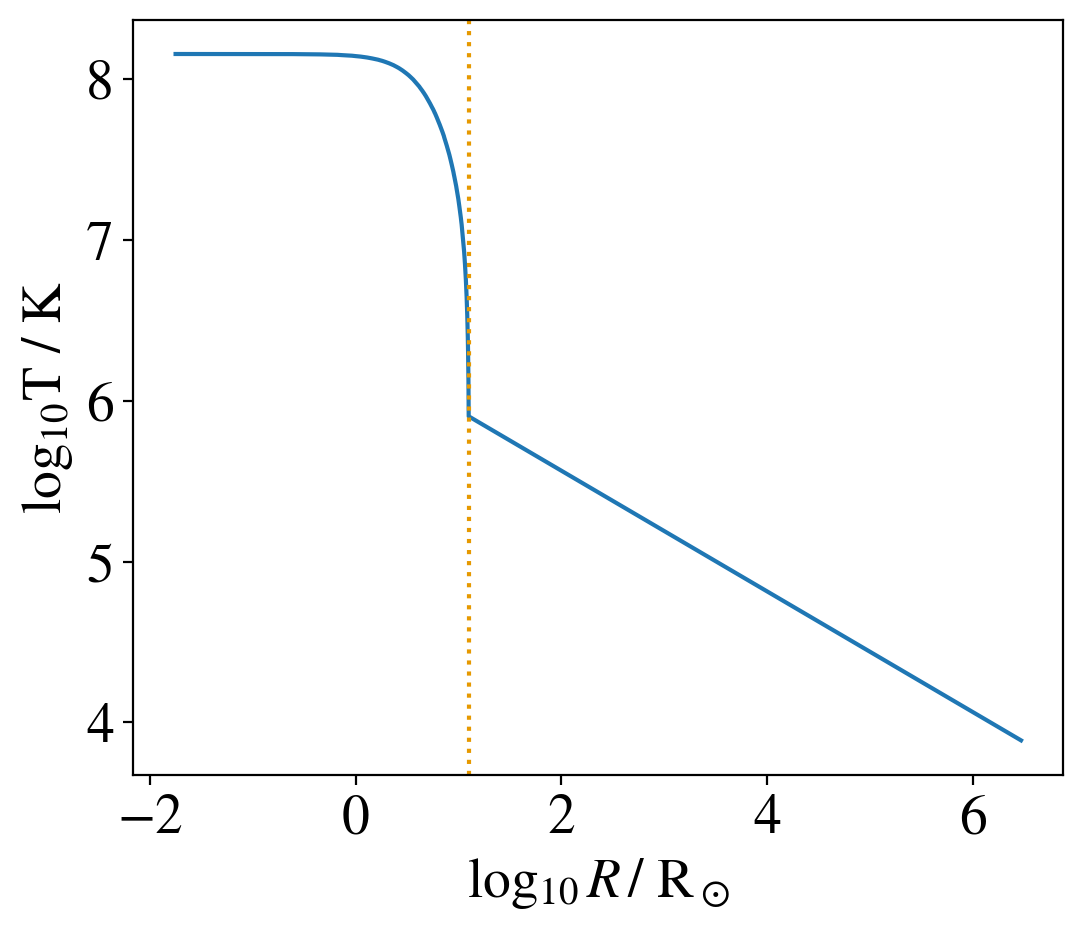

In [521]:
plt.rcParams['figure.figsize'] = (6,5)
fig, axis = plt.subplots(dpi=100)
axis.cla() # Clear Axis
#axis.plot(np.log10(r_stream),np.log10(T_stream_scaled))
axis.plot(np.log10(r_star_stream),np.log10(T_star_stream))
#axis.plot(p.logR,p.logT)
axis.axvline(x=np.log10(r_shock/c.rsun), color=ORANGE, linestyle=':')
axis.set_xlabel("$\log_{10} \,R \,/ $ R$_\odot$")
axis.set_ylabel(r"$\log_{10} $T / K")
print(T_stream_scaled[-1])

Text(0, 0.5, '$\\log_{10}\\, \\rho$')

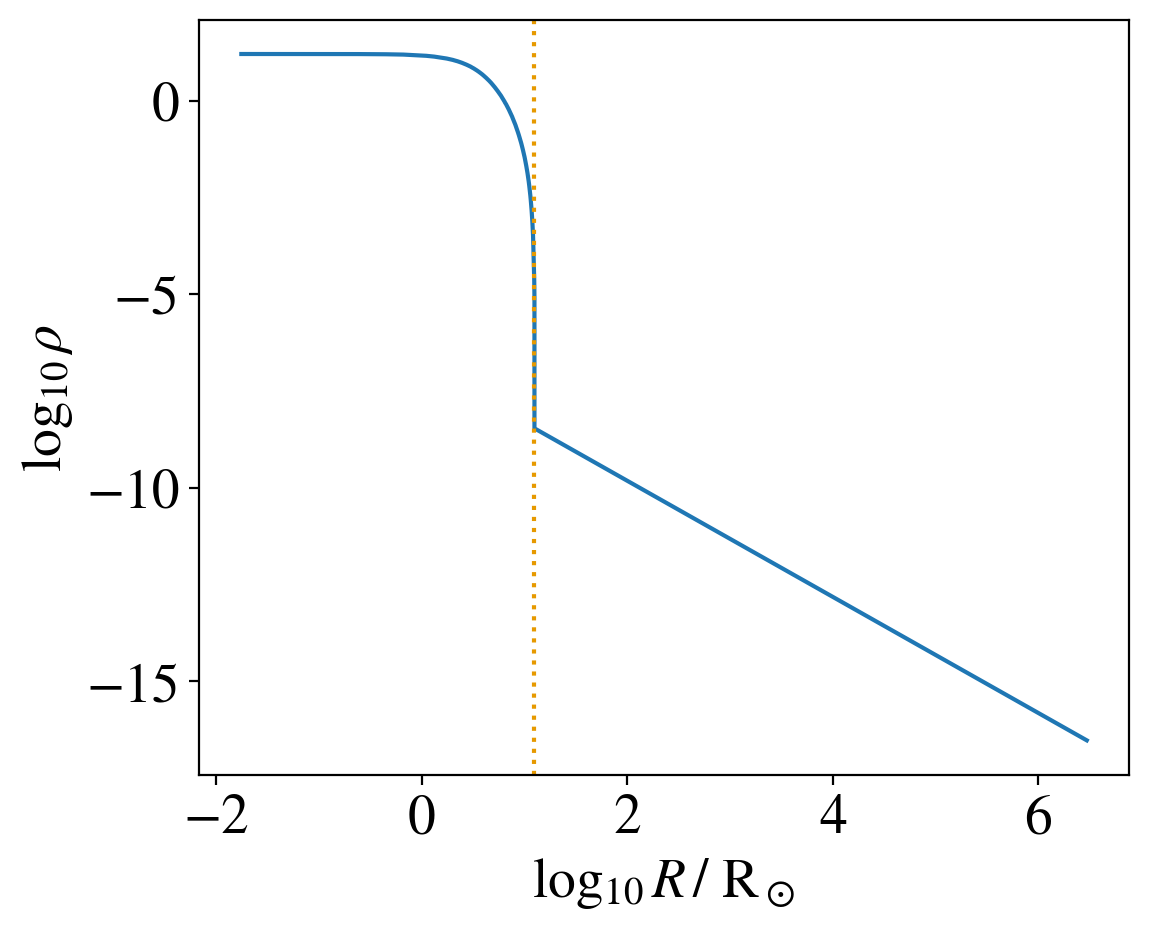

In [519]:
plt.rcParams['figure.figsize'] = (6,5)
fig, axis = plt.subplots(dpi=100)
axis.cla() # Clear Axis
axis.plot(np.log10(r_star_stream),np.log10(rho_star_stream))
axis.axvline(x=np.log10(r_shock/c.rsun), color=ORANGE, linestyle=':')
axis.set_xlabel("$\log_{10} \,R \,/ $ R$_\odot$")
axis.set_ylabel(r"$\log_{10}\, \rho$")

### Calculate cumulative mass array

7733.04719820857


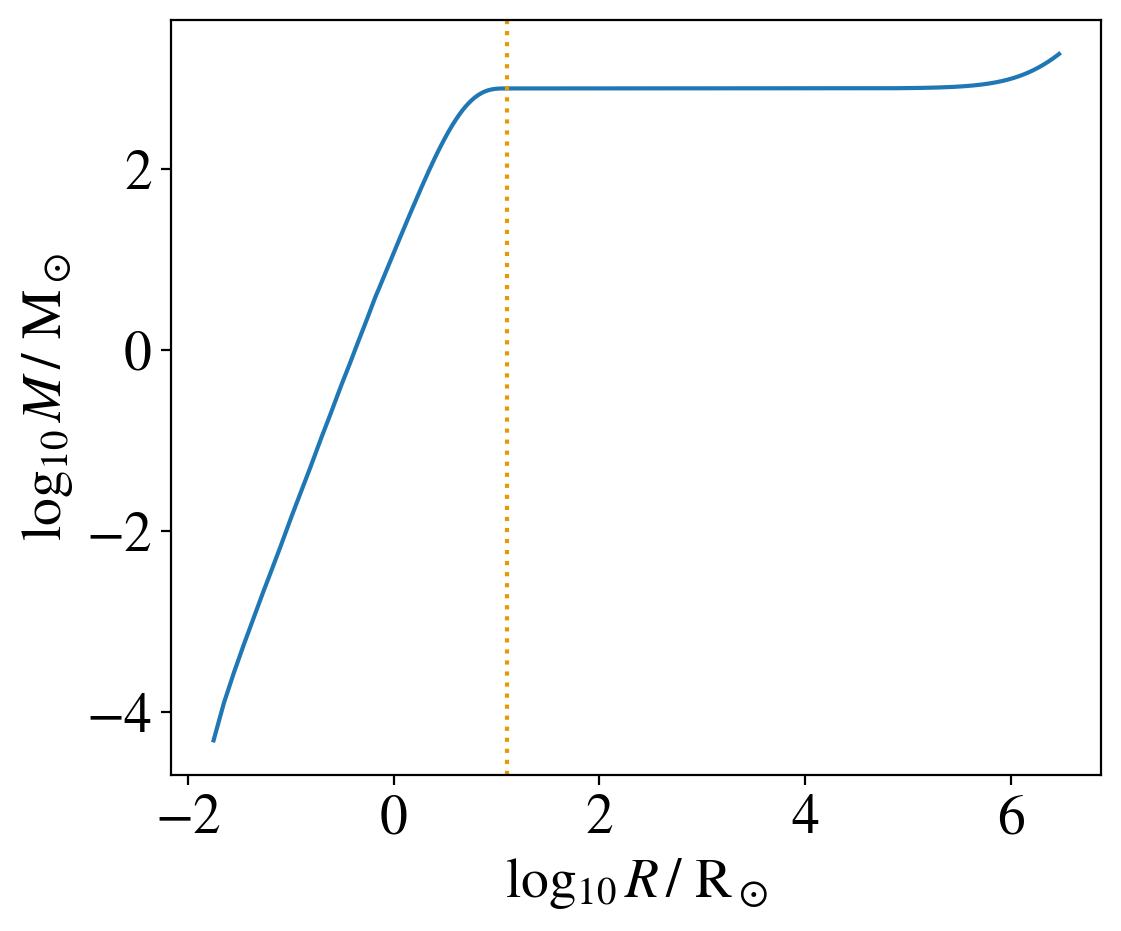

In [520]:
# Calculate the differences between consecutive elements in r_star_stream
dr = np.diff(r_star_stream)

# Since np.diff returns an array that is one element shorter, you need to decide how to handle the initial dr.
# One common approach is to prepend the difference array with the first difference again or use an initial dr value.
# For example, we can assume the first dr is the same as the first actual calculated difference.
dr = np.insert(dr, 0, dr[0])

# Now calculate dm_star_stream  
dm_star_stream = 4.0 * np.pi * rho_star_stream * dr * c.rsun * (r_star_stream * c.rsun) ** 2.0

# And finally calculate the cumulative mass
mass_star_stream = np.cumsum(dm_star_stream)

plt.rcParams['figure.figsize'] = (6,5)
fig, axis = plt.subplots(dpi=100)
axis.cla() # Clear Axis
#axis.plot(np.log10(r_stream),np.log10(T_stream_scaled))
#axis.plot(np.log10(r_star_stream),np.log10(T_star_stream))
#axis.plot(p.logR,p.logT)
axis.set_xlabel("$\log_{10} \,R \,/ $ R$_\odot$")
axis.set_ylabel(r"$\log_{10} \,M \,/ $ M$_\odot$")
print(T_stream_scaled[-1])
axis.plot(np.log10(r_star_stream),np.log10(mass_star_stream/c.msun))
axis.axvline(x=np.log10(r_shock/c.rsun), color=ORANGE, linestyle=':')

### Calculate sound speed 

In [477]:
gamma = 5.0/3.0
cs = (gamma*T_star_stream*c.kB/c.mp)**0.5

7733.04719820857


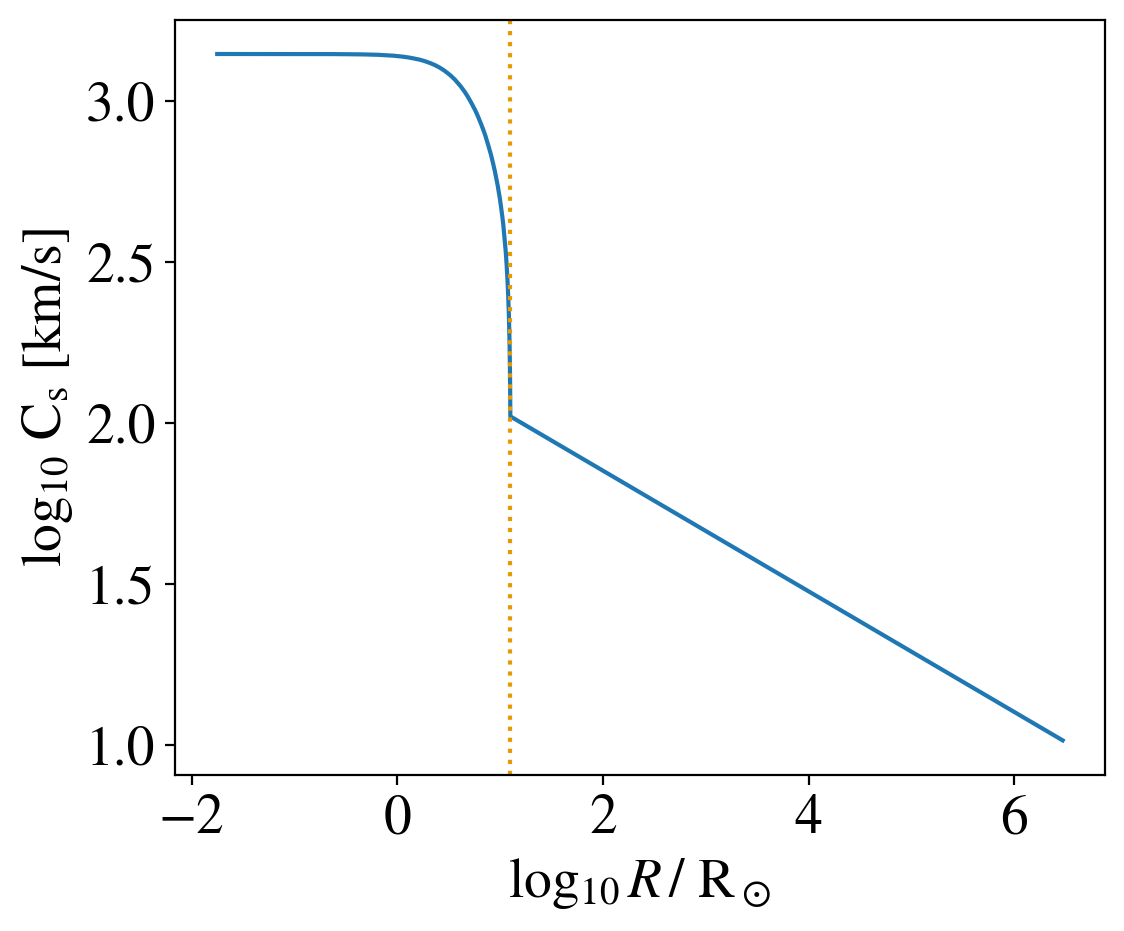

In [522]:
plt.rcParams['figure.figsize'] = (6,5)
fig, axis = plt.subplots(dpi=100)
axis.cla() # Clear Axis
#axis.plot(np.log10(r_stream),np.log10(T_stream_scaled))
axis.plot(np.log10(r_star_stream),np.log10(cs/1e5))
axis.axvline(x=np.log10(r_shock/c.rsun), color=ORANGE, linestyle=':')
#axis.plot(p.logR,p.logT)
axis.set_xlabel("$\log_{10} \,R \,/ $ R$_\odot$")
axis.set_ylabel(r"$\log_{10}$ C$_{\rm s}$ [km/s]")
print(T_stream_scaled[-1])

### Calculate velocity in the accretion stream

<ipython-input-523-4c63e7dcee8b>:5: RuntimeWarning: divide by zero encountered in log10
  axis.plot(np.log10(r_star_stream),np.log10(v_star_stream/1e5))


Text(0, 0.5, '$\\log_{10}$ V$_{\\rm s}$ [km/s]')

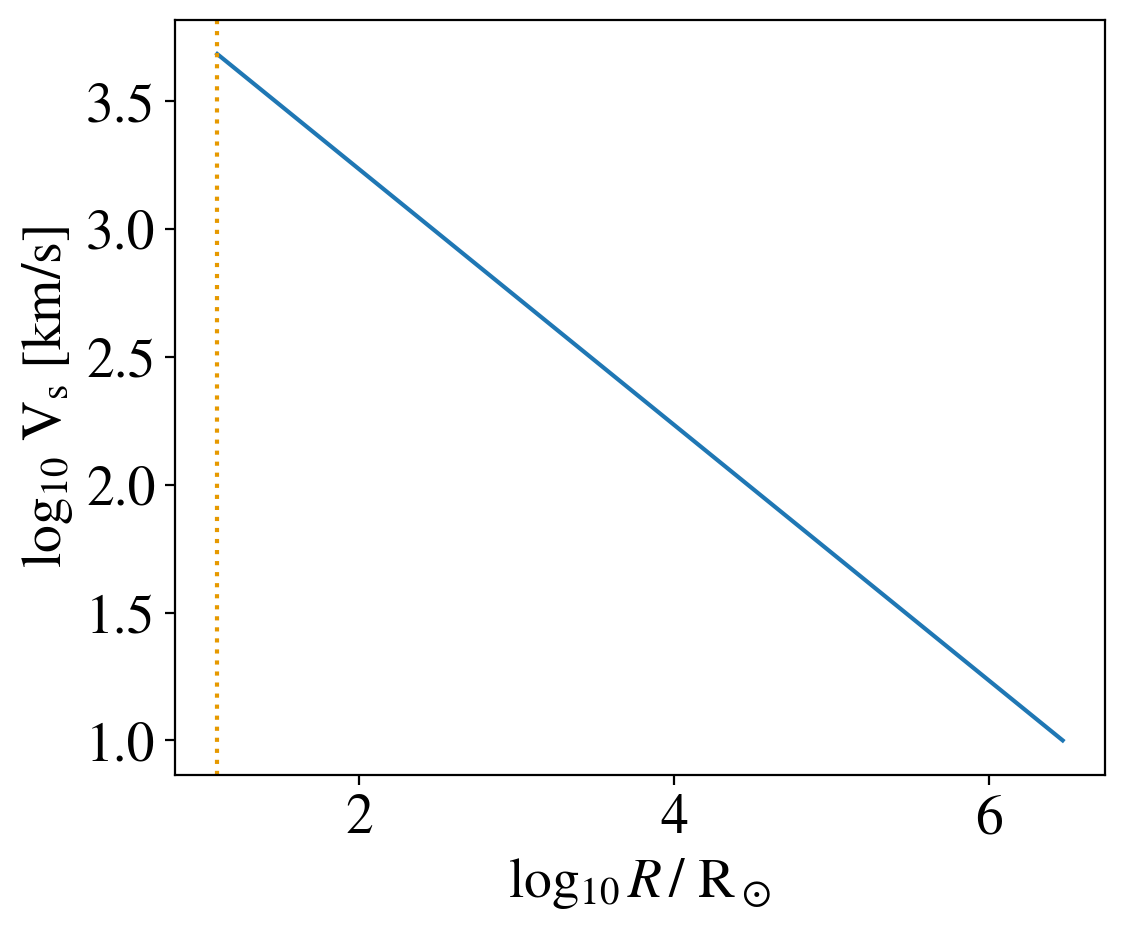

In [523]:
plt.rcParams['figure.figsize'] = (6,5)
fig, axis = plt.subplots(dpi=100)
axis.cla() # Clear Axis
#axis.plot(np.log10(r_stream),np.log10(T_stream_scaled))
axis.plot(np.log10(r_star_stream),np.log10(v_star_stream/1e5))
axis.axvline(x=np.log10(r_shock/c.rsun), color=ORANGE, linestyle=':')
#axis.plot(p.logR,p.logT)
axis.set_xlabel("$\log_{10} \,R \,/ $ R$_\odot$")
axis.set_ylabel(r"$\log_{10}$ V$_{\rm s}$ [km/s]")
#print(T_stream_scaled[-1])

# Orbit Integration: Constant Density

Collision event occurred at t = 0.8277982948607349 years.


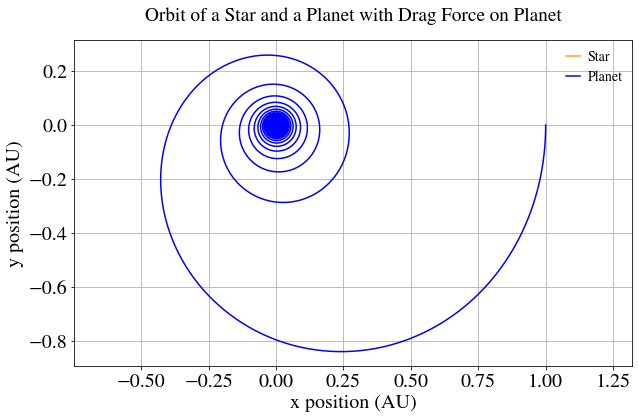

In [16]:
#######################################################
##  This first example is ported from some toy model  # 
##  I've built for the planetary engulfment problem   # 
#######################################################

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
#G = 6.67430e-8  # Gravitational constant in CGS units
MSun = 1.989e33  # Mass of the sun in grams
au = 1.496e13    # 1 Astronomical Unit in cm

# Masses of the star and the planet
M_star = 1.0 * c.msun
M_planet = 0.001 * c.msun

# Initial positions and velocities
r_star_initial = np.array([0.0, 0.0])  # Star initial position
r_planet_initial = np.array([au, 0.0])  # Planet initial position
#v_star_initial = np.array([0.0, np.sqrt(G * M_planet / np.linalg.norm(r_planet_initial))])   # Star initial velocity
#v_planet_initial = np.array([0.0, -np.sqrt(G * M_star / np.linalg.norm(r_planet_initial))])  # Planet initial velocity


# Initial velocities - setting them so that the total momentum is zero
v_planet_initial_mag = np.sqrt(c.G * M_star / np.linalg.norm(r_planet_initial - r_star_initial))
v_star_initial = M_planet / M_star * v_planet_initial_mag * (r_planet_initial - r_star_initial) / np.linalg.norm(r_planet_initial - r_star_initial)
v_planet_initial = v_planet_initial_mag * (r_star_initial - r_planet_initial) / np.linalg.norm(r_star_initial - r_planet_initial)

v_star_initial=v_star_initial[::-1]
v_planet_initial=v_planet_initial[::-1]

#print(v_planet_initial_mag,v_star_initial[::-1],v_planet_initial[::-1])
# [Equations of Motion]


# Drag force parameters
C_d = 0.8   # Drag coefficient
rho = 5e-2  # Medium density in g/cm^3
r_planet = 6.371e8  # Radius of the planet in cm (e.g., Earth's radius)
A_planet = np.pi * r_planet**2  # Cross-sectional area in cm^2

# Equations of motion
def equations_of_motion(t, y):
    r_star, r_planet, v_star, v_planet = y[:2], y[2:4], y[4:6], y[6:]
    r = r_planet - r_star  # Vector from star to planet
    distance = np.linalg.norm(r)
    force = c.G * M_star * M_planet / distance**2
    acc_star = force * r / (distance * M_star)
    acc_planet = -force * r / (distance * M_planet)

    # Calculate the drag force
    v_planet_mag = np.linalg.norm(v_planet)
    v_planet_hat = v_planet / v_planet_mag
    F_drag = -0.5 * C_d * rho * A_planet * v_planet_mag**2 * v_planet_hat
    acc_drag = F_drag / M_planet  # Acceleration due to drag

    # Add the drag acceleration to the planet's acceleration
    acc_planet += acc_drag

    return np.concatenate((v_star, v_planet, acc_star, acc_planet))

# Define an event function to stop integration when the planet reaches the star

def collision_event(t, y):
    r_star, r_planet = y[:2], y[2:4]
    distance = np.linalg.norm(r_planet - r_star)
    collision_distance = 1e11  # 1 km in cm
    return distance - collision_distance

# Set the event to be terminal

collision_event.terminal = True
collision_event.direction = -1  # Trigger only when the distance is decreasing


# Initial state
initial_state = np.concatenate((r_star_initial, r_planet_initial, v_star_initial, v_planet_initial))

# Time span for the integration (in seconds)
t_start = 0
t_end = 5*3.15e7  # One year
num_points = 10000
t_eval = np.linspace(t_start, t_end, num_points)

# Solve the equations of motion
solution = solve_ivp(equations_of_motion, [t_start, t_end], initial_state, method='RK45', t_eval=t_eval, atol=1e-10, rtol=1e-10, events=collision_event)

# Extract the results
times = solution.t
positions = solution.y.T

if solution.status == 1:
    print(f"Collision event occurred at t = {solution.t_events[0][0]/3.15e7} years.")
else:
    print("No collision event occurred within the integration time span.")

# Plotting
plt.figure(figsize=(10, 6))
#plt.scatter(positions[:, 0] / au, positions[:, 1] / au, label='Star', linestyle='-', color='orange')
#plt.scatter(positions[:, 2] / au, positions[:, 3] / au, label='Planet', linestyle='-',  color='blue')
plt.plot(positions[:, 0] / au, positions[:, 1] / au, label='Star', linestyle='-', color='orange')
plt.plot(positions[:, 2] / au, positions[:, 3] / au, label='Planet', linestyle='-',  color='blue')
plt.xlabel('x position (AU)')
plt.ylabel('y position (AU)')
plt.legend()
plt.title('Orbit of a Star and a Planet with Drag Force on Planet')
plt.grid(True)
plt.axis('equal')
plt.show()


# Orbit Integration: Variable Density
Density inside the accretion stream and the AGN star is changing rapidly, so we need to interpolate rho(r)

In [17]:
from scipy.interpolate import interp1d

# Assuming rho_star and radius_star are defined and sorted in increasing order
#rho_star_function = interp1d(r_star_stream*c.rsun, rho_star_stream, kind='linear', fill_value="extrapolate")
rho_star_function = interp1d(r_star_stream*c.rsun, rho_star_stream, kind='linear', assume_sorted=True, bounds_error=False, fill_value="extrapolate")


In [335]:
# Doublecheck we get the ISM density at the top of the Bondi sphere
Bondi_radius = r_star_stream[-1]
current_rho = rho_star_function(Bondi_radius*c.rsun)
print(current_rho)

3e-17


Starting Integration at r/rsun=  5.3615039910897675
524692258.3923614 [6784729.86878349       0.        ] [-5.24692258e+08  0.00000000e+00]
No collision event occurred within the integration time span.


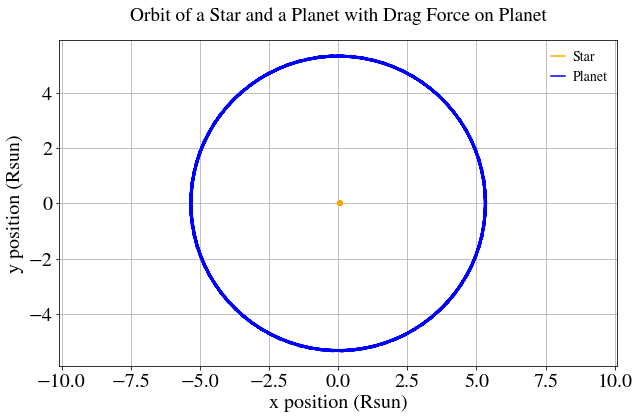

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
#G = 6.67430e-8  # Gravitational constant in CGS units
MSun = 1.989e33  # Mass of the sun in grams
au = 1.496e13    # 1 Astronomical Unit in cm

start = r_star_stream[200]*c.rsun

# Masses of the star and the planet
M_star = M * c.msun
M_planet = 10 * c.msun
R_planet = 6.371e8  # Radius of the planet in cm (e.g., Earth's radius) 
R_star = r_star[0]*c.rsun

print('Starting Integration at r/rsun= ',start/c.rsun)

# Initial positions and velocities
r_star_initial = np.array([0.0, 0.0])  # Star initial position
r_planet_initial = np.array([start, 0.0])  # Planet initial position
#v_star_initial = np.array([0.0, np.sqrt(G * M_planet / np.linalg.norm(r_planet_initial))])   # Star initial velocity
#v_planet_initial = np.array([0.0, -np.sqrt(G * M_star / np.linalg.norm(r_planet_initial))])  # Planet initial velocity


# Initial velocities - setting them so that the total momentum is zero
v_planet_initial_mag = np.sqrt(c.G * M_star / np.linalg.norm(r_planet_initial - r_star_initial))
v_star_initial = M_planet / M_star * v_planet_initial_mag * (r_planet_initial - r_star_initial) / np.linalg.norm(r_planet_initial - r_star_initial)
v_planet_initial = v_planet_initial_mag * (r_star_initial - r_planet_initial) / np.linalg.norm(r_star_initial - r_planet_initial)

v_star_initial=v_star_initial[::-1]
v_planet_initial=v_planet_initial[::-1]

print(v_planet_initial_mag,v_star_initial[::-1],v_planet_initial[::-1])
# [Equations of Motion]


# Drag force parameters
C_d = 0.8   # Drag coefficient
rho = 5e-2  # Medium density in g/cm^3
A_planet = np.pi * R_planet**2  # Cross-sectional area in cm^2

# Equations of motion
def equations_of_motion(t, y):
    R_star, R_planet, v_star, v_planet = y[:2], y[2:4], y[4:6], y[6:]
    R = R_planet - R_star  # Vector from star to planet
    distance = np.linalg.norm(R)
    force = c.G * M_star * M_planet / distance**2
    acc_star = force * R / (distance * M_star)
    acc_planet = -force * R / (distance * M_planet)
    
    
    # Find the interpolated density at the current distance
    current_rho = rho_star_function(distance)
    #print(distance/c.rsun,current_rho)

    
    # Calculate the drag force using the interpolated density 
    v_planet_mag = np.linalg.norm(v_planet)
    v_planet_hat = v_planet / v_planet_mag
    F_drag = -0.5 * C_d * current_rho * A_planet * v_planet_mag**2 * v_planet_hat
    acc_drag = F_drag / M_planet  # Acceleration due to drag

    # Add the drag acceleration to the planet's acceleration
    acc_planet += acc_drag

    return np.concatenate((v_star, v_planet, acc_star, acc_planet))

# Define an event function to stop integration when the planet reaches the star

def collision_event(t, y):
    r_star, r_planet = y[:2], y[2:4]
    distance = np.linalg.norm(R_planet - R_star)
    collision_distance = 1e11  # 1 km in cm
    return distance - collision_distance

# Set the event to be terminal

collision_event.terminal = True
collision_event.direction = -1  # Trigger only when the distance is decreasing


# Initial state
initial_state = np.concatenate((r_star_initial, r_planet_initial, v_star_initial, v_planet_initial))

# Time span for the integration (in seconds)
t_start = 0
t_end =  5*3.15e4  # One year
num_points = 1000
t_eval = np.linspace(t_start, t_end, num_points)

# Solve the equations of motion
#solution = solve_ivp(equations_of_motion, [t_start, t_end], initial_state, method='RK45', t_eval=t_eval, atol=1e-10, rtol=1e-10, events=collision_event)
#solution = solve_ivp(equations_of_motion, [t_start, t_end], initial_state, method='LSODA', t_eval=t_eval, atol=1e-8, rtol=1e-8, events=collision_event)
solution = solve_ivp(equations_of_motion, [t_start, t_end], initial_state, method='RK23', t_eval=t_eval, atol=1e-6, rtol=1e-6, events=collision_event)

# 'RK23', 'DOP853'


# Extract the results
times = solution.t
positions = solution.y.T

if solution.status == 1:
    print(f"Collision event occurred at t = {solution.t_events[0][0]/3.15e7} years.")
else:
    print("No collision event occurred within the integration time span.")

# Plotting
plt.figure(figsize=(10, 6))
#plt.scatter(positions[:, 0] / au, positions[:, 1] / au, label='Star', linestyle='-', color='orange')
#plt.scatter(positions[:, 2] / au, positions[:, 3] / au, label='Planet', linestyle='-',  color='blue')
plt.plot(positions[:, 0] / c.rsun, positions[:, 1] / c.rsun, label='Star', linestyle='-', color='orange')
plt.plot(positions[:, 2] / c.rsun, positions[:, 3] / c.rsun, label='Planet', linestyle='-',  color='blue')
plt.xlabel('x position (Rsun)')
plt.ylabel('y position (Rsun)')
plt.legend()
plt.title('Orbit of a Star and a Planet with Drag Force on Planet')
plt.grid(True)
plt.axis('equal')
plt.show()



In [31]:
def run_simulation():
    import time
    from IPython.display import display, update_display
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    from scipy.integrate import solve_ivp
    
    start_time = time.time()
    last_update_time = start_time
    display_handle = display("Starting...", display_id=True)
    
    
    # Constants
    #G = 6.67430e-8  # Gravitational constant in CGS units
    #MSun = 1.989e33  # Mass of the sun in grams
    au = 1.496e13    # 1 Astronomical Unit in cm
    
    start = r_star_stream[550]*c.rsun
    # Masses of the star and the planet
    M_star = M * c.msun
    M_planet = 10 * c.msun
    R_planet = (2.0*c.G*M_planet)/(c.c**2.0) # BH radius #6.371e8  # Radius of the planet in cm (e.g., Earth's radius) 
    R_star = r_star[0]*c.rsun

    
    
    for checkpoint in range(1, 1001):  # 1000 checkpoints in  simulation
       
        # Calculate elapsed time and estimated total time
        current_time = time.time()
        elapsed_time = current_time - start_time
        estimated_total_time = elapsed_time / checkpoint * 1000
        remaining_time = estimated_total_time - elapsed_time
        
        # Update the display every checkpoint
        display_text = f"Checkpoint {checkpoint}/1000, Elapsed Time: {elapsed_time:.2f}s, Estimated Time Remaining: {remaining_time:.2f}s"
        update_display(display_text, display_id=display_handle.display_id)

        # Initial positions and velocities
        r_star_initial = np.array([0.0, 0.0])  # Star initial position
        r_planet_initial = np.array([start, 0.0])  # Planet initial position
        #v_star_initial = np.array([0.0, np.sqrt(G * M_planet / np.linalg.norm(r_planet_initial))])   # Star initial velocity
        #v_planet_initial = np.array([0.0, -np.sqrt(G * M_star / np.linalg.norm(r_planet_initial))])  # Planet initial velocity


        # Initial velocities - setting them so that the total momentum is zero
        v_planet_initial_mag = np.sqrt(c.G * M_star / np.linalg.norm(r_planet_initial - r_star_initial))
        v_star_initial = M_planet / M_star * v_planet_initial_mag * (r_planet_initial - r_star_initial) / np.linalg.norm(r_planet_initial - r_star_initial)
        v_planet_initial = v_planet_initial_mag * (r_star_initial - r_planet_initial) / np.linalg.norm(r_star_initial - r_planet_initial)

        v_star_initial=v_star_initial[::-1]
        v_planet_initial=v_planet_initial[::-1]
        
        
        # [Equations of Motion]


        # Drag force parameters
        C_d = 10.0 #0.8   # Drag coefficient
        # C_g = # Need to implement Drag coefficient for gravo-drag
        A_planet = np.pi * R_planet**2.0  # Cross-sectional area in cm^2

        # Defines Bondi-Hoyle Radius (aka gravitational focusing)

        def bh_radius(M,Vrel):
            bh_r = (2.0*c.G* M ) / (Vrel**2.0)
            return bh_r

        # Equations of motion
        def equations_of_motion(t, y):
            R_star, R_planet, v_star, v_planet = y[:2], y[2:4], y[4:6], y[6:]
            R = R_planet - R_star  # Vector from star to planet
            distance = np.linalg.norm(R)
            
            force = c.G * M_star * M_planet / distance**2
            acc_star = force * R / (distance * M_star)
            acc_planet = -force * R / (distance * M_planet)
            v_planet_mag = np.linalg.norm(v_planet)
            v_planet_hat = v_planet / v_planet_mag

            # Find the interpolated density at the current distance
            current_rho = rho_star_function(distance)

            # Calculate Bondi-Hoyle radius for gravo-drag
            bh_r = bh_radius(M_planet,v_planet_mag)
            A_bh = np.pi * bh_r**2

            # Select max area (Hydro- vs gravo-drago)
            Area = max(A_planet,  A_bh)

            # Calculate the drag force using the interpolated density 
            F_drag = -0.5 * C_d * current_rho * Area * v_planet_mag**2 * v_planet_hat
            acc_drag = F_drag / M_planet  # Acceleration due to drag

            # Add the drag acceleration to the planet's acceleration
            acc_planet += acc_drag
                    

            return np.concatenate((v_star, v_planet, acc_star, acc_planet))

        # Define an event function to stop integration when the planet reaches the star

        def collision_event(t, y):
            r_star, r_planet = y[:2], y[2:4]
            distance = np.linalg.norm(R_planet - R_star)
            collision_distance = 1e9  # 10 km in cm
            return distance - collision_distance

        # Set the event to be terminal

        collision_event.terminal = True
        collision_event.direction = -1  # Trigger only when the distance is decreasing


        # Initial state
        initial_state = np.concatenate((r_star_initial, r_planet_initial, v_star_initial, v_planet_initial))

        # Time span for the integration (in seconds)
        t_start = 0
        t_end = 3*3.15e5 # 3*3.15e5  # One year
        num_points = 1000
        t_eval = np.linspace(t_start, t_end, num_points)

        # Solve the equations of motion (with different solvers)
        solution = solve_ivp(equations_of_motion, [t_start, t_end], initial_state, method='RK45', t_eval=t_eval, atol=1e-8, rtol=1e-8)#, events=collision_event)
        #solution = solve_ivp(equations_of_motion, [t_start, t_end], initial_state, method='LSODA', t_eval=t_eval, atol=1e-8, rtol=1e-8, events=collision_event)
        #solution = solve_ivp(equations_of_motion, [t_start, t_end], initial_state, method='RK23', t_eval=t_eval, atol=1e-8, rtol=1e-8, events=collision_event)
        #solution = solve_ivp(equations_of_motion, [t_start, t_end], initial_state, method='DOP853', t_eval=t_eval, atol=1e-10, rtol=1e-10, events=collision_event)
        #solution = solve_ivp(equations_of_motion, [t_start, t_end], initial_state, method='Radau', t_eval=t_eval, atol=1e-5, rtol=1e-5, events=collision_event)
        #solution = solve_ivp(equations_of_motion, [t_start, t_end], initial_state, method='BDF', t_eval=t_eval, atol=1e-5, rtol=1e-5, events=collision_event)
      
        

    # Extract the results
    times = solution.t
    positions = solution.y.T

    # Velocities of the star
    v_star_x = solution.y[4]  # x-component of the star's velocity
    v_star_y = solution.y[5]  # y-component of the star's velocity

    # Velocities of the planet
    v_planet_x = solution.y[6]  # x-component of the planet's velocity
    v_planet_y = solution.y[7]  # y-component of the planet's velocity
    
    # Calculating the magnitudes of the velocities
    v_star_magnitude = np.sqrt(v_star_x**2 + v_star_y**2)
    v_planet_magnitude = np.sqrt(v_planet_x**2 + v_planet_y**2)

    display_text = f"Simulation completed in {elapsed_time:.2f}s."
    update_display(display_text, display_id=display_handle.display_id)
    
    #if solution.status == 1:
    #    print(f"Collision event occurred at t = {solution.t_events[0][0]/3.15e7} years.")
    #else:
    #    print("No collision event occurred within the integration time span.")
           
        
    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    #plt.scatter(positions[:, 0] / au, positions[:, 1] / au, label='Star', linestyle='-', color='orange')
    #plt.scatter(positions[:, 2] / au, positions[:, 3] / au, label='Planet', linestyle='-',  color='blue')
    ax.plot(positions[:, 0] / c.rsun, positions[:, 1] / c.rsun, label='AGN Star Center' , linestyle='-', color='orange')
    ax.plot(positions[:, 2] / c.rsun, positions[:, 3] / c.rsun, label='Secondary Object' , linestyle='-',  color='blue')

    # Plotting Bondi radius and star locations as circles
    # Create a dashed circle: specify its center, radius, and linestyle
    circle = patches.Circle((0.0, 0.0), R_star/c.rsun, edgecolor='black', facecolor='none', linestyle='--')
    # Add the circle to the axes
    ax.add_patch(circle)


    ax.set_xlabel('x position (Rsun)')
    ax.set_ylabel('y position (Rsun)')
    ax.legend()
    #ax.title('Orbit of an AGN Star and a Secondary with Drag Force')
    ax.grid(True)
    ax.axis('equal')
  
    
    fig1, ax1 = plt.subplots(figsize=(10, 6))
    ax1.plot(times/c.yr, v_planet_magnitude/1e5, label='Velocity of Secondary' , linestyle='-',  color='black')
    ax1.plot(times/c.yr, v_star_magnitude/1e5, label='Velocity of Primary' , linestyle='--',  color='red')

    ax1.set_ylabel('Velocity (km/s)')
    ax1.set_xlabel('Time (yr)')
    ax1.legend()
    #ax.title('Orbit of an AGN Star and a Secondary with Drag Force')
   
    x1 = positions[:, 0]
    x2 = positions[:, 2]
    y1 = positions[:, 1]
    y2 = positions[:, 3]
    
    delta = ((x2 - x1)**2 + (y2 - y1)**2)**0.5
    
    fig2, ax2 = plt.subplots(figsize=(10, 6))
    ax2.plot(times/c.yr, delta / c.rsun, linestyle='-',  color='black')
    ax2.set_ylabel('Distance (Rsun)')
    ax2.set_xlabel('Time (yr)')
    ax2.legend()


'Simulation completed in 1311.23s.'

No handles with labels found to put in legend.


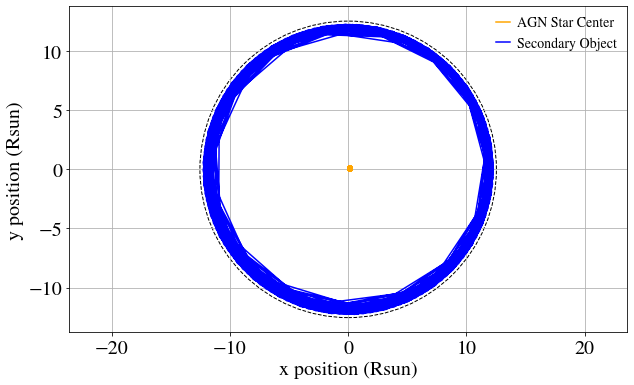

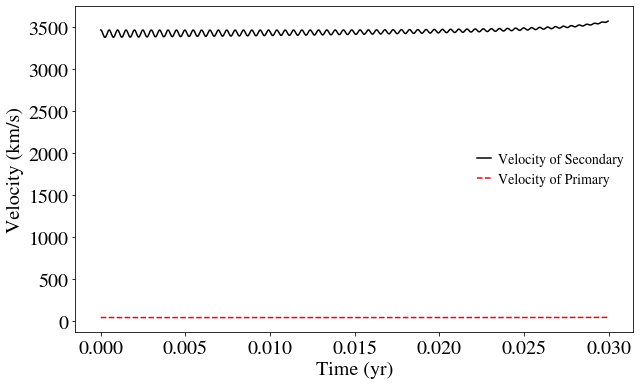

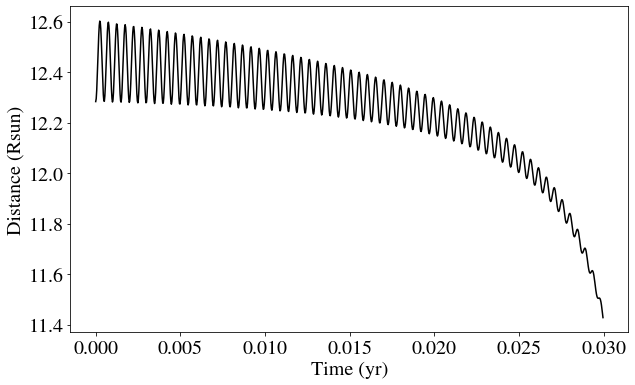

In [32]:
#%prun run_simulation()
run_simulation()
# Problem when the object gets too close. Debug!

## Cleaned up version of the code

In [16]:
from scipy.interpolate import interp1d

# Assuming rho_star and radius_star are defined and sorted in increasing order
#rho_star_function = interp1d(r_star_stream*c.rsun, rho_star_stream, kind='linear', fill_value="extrapolate")
rho_star_function = interp1d(r_star_stream*c.rsun, rho_star_stream, kind='linear', assume_sorted=True, bounds_error=False, fill_value="extrapolate")


In [73]:
import time
from IPython.display import display, update_display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.integrate import solve_ivp


def run_simulation():
    start_time = time.time()

    # Constants
    au = 1.496e13  # Astronomical Unit in cm
    start = r_star_stream[550] * c.rsun  # Starting position
    
    # Masses and radii
    M_1 = M * c.msun  # Mass of the first object
    M_2 = 10 * c.msun  # Mass of the second object
    R_1 = r_star[0] * c.rsun  # Radius of the first object
    R_2 = (2.0 * c.G * M_2) / (c.c ** 2.0)  # Schwarzschild radius for the second object
    
    # Drag force parameters
    C_d = 10.0  # Drag coefficient
    A = np.pi * R_2 ** 2.0  # Cross-sectional area

    # Time span for the integration
    t_start = 0
    t_end = 1.50 * 3.15e6  # Simulation end time
    num_points = 10000
    t_eval = np.linspace(t_start, t_end, num_points)

    # Display initial message
    display_handle = display("Starting...", display_id=True)

    # Function to calculate Bondi-Hoyle radius
    def bh_radius(M, Vrel):
        return (2.0 * c.G * M) / (Vrel ** 2.0)

    # Equations of motion
    def equations_of_motion(t, y):
        # Unpack the state vector
        R_1, R_2, v_1, v_2 = y[:2], y[2:4], y[4:6], y[6:]
        R = R_2 - R_1
        distance = np.linalg.norm(R)

        # Gravitational force and acceleration
        force = c.G * M_1 * M_2 / distance ** 2
        acc_1 = force * R / (distance * M_1)
        acc_2 = -force * R / (distance * M_2)

        # Drag force
        v_2_mag = np.linalg.norm(v_2)
        v_2_hat = v_2 / v_2_mag
        current_rho = rho_star_function(distance)
        bh_r = bh_radius(M_2, v_2_mag)
        A_bh = np.pi * bh_r ** 2
        Area = max(A, A_bh)
        F_drag = -0.5 * C_d * current_rho * Area * v_2_mag ** 2 * v_2_hat
        acc_drag = F_drag / M_2
        acc_2 += acc_drag

        return np.concatenate((v_1, v_2, acc_1, acc_2))

    # Collision event function
    def collision_event(t, y):
        r_1, r_2 = y[:2], y[2:4]
        distance = np.linalg.norm(r_2 - r_1)
        collision_distance = 1e6  # Collision threshold
        return distance - collision_distance
    
    collision_event.terminal = True
    collision_event.direction = -1

    # Initial state vector
    r_1_initial = np.array([0.0, 0.0])  # Star initial position
    r_2_initial = np.array([start, 0.0])  # Planet initial position
    v_2_initial_mag = np.sqrt(c.G * M_1 / np.linalg.norm(r_2_initial - r_1_initial))
    v_1_initial = M_2 / M_1 * v_2_initial_mag * (r_2_initial - r_1_initial) / np.linalg.norm(r_2_initial - r_1_initial)
    v_2_initial = v_2_initial_mag * (r_1_initial - r_2_initial) / np.linalg.norm(r_1_initial - r_2_initial)
    v_1_initial = v_1_initial[::-1]
    v_2_initial = v_2_initial[::-1]
    initial_state = np.concatenate((r_1_initial, r_2_initial, v_1_initial, v_2_initial))

    # Solve the equations of motion
    solution = solve_ivp(equations_of_motion, [t_start, t_end], initial_state, method='RK45', t_eval=t_eval, atol=1e-8, rtol=1e-8, events=collision_event)

    # Extract and process results
    times = solution.t
    positions = solution.y.T

    # Update display upon completion
    elapsed_time = time.time() - start_time
    display_text = f"Simulation completed in {elapsed_time:.2f}s."
    update_display(display_text, display_id=display_handle.display_id)

    if solution.status == 1:
        print(f"Collision event occurred at t = {solution.t_events[0][0] / 3.15e7} years.")
    else:
        print("No collision event occurred within the integration time span.")
    
    # Calculate velocity magnitudes 
    v_1_magnitude = np.sqrt(solution.y[4] ** 2 + solution.y[5] ** 2)
    v_2_magnitude = np.sqrt(solution.y[6] ** 2 + solution.y[7] ** 2)
    
    return solution.y.T, solution.t, v_1_magnitude, v_2_magnitude, R_1


def plot_simulation_results(positions, times, v_1_magnitude, v_2_magnitude, R_1):
    
    # Plotting the trajectories of the two objects
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(positions[:, 0] / c.rsun, positions[:, 1] / c.rsun, label='AGN Star Center', linestyle='-', color='orange')
    ax.plot(positions[:, 2] / c.rsun, positions[:, 3] / c.rsun, label='Secondary Object', linestyle='-', color='blue')
    circle = patches.Circle((0.0, 0.0), R_1 / c.rsun, edgecolor='black', facecolor='none', linestyle='--')
    ax.add_patch(circle)
    ax.set_xlabel('x position (Rsun)')
    ax.set_ylabel('y position (Rsun)')
    ax.legend()
    ax.grid(True)
    ax.axis('equal')

    # Plotting the velocities of the two objects
    

    
    fig1, ax1 = plt.subplots(figsize=(10, 6))
    ax1.plot(times / c.yr, v_2_magnitude / 1e5, label='Velocity of Secondary', linestyle='-', color='black')
    ax1.plot(times / c.yr, v_1_magnitude / 1e5, label='Velocity of Primary', linestyle='--', color='red')
    ax1.set_ylabel('Velocity (km/s)')
    ax1.set_xlabel('Time (yr)')
    ax1.legend()

    # Calculating and plotting the separation distance between the two objects over time
    
    x1, y1 = positions[:, 0], positions[:, 1]  # Positions of object 1
    x2, y2 = positions[:, 2], positions[:, 3]  # Positions of object 2

    # Calculate the separation distance for each time step
    delta = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

    
    fig2, ax2 = plt.subplots(figsize=(10, 6))
    ax2.plot(times / c.yr, delta / c.rsun, linestyle='-', color='green')
    ax2.set_ylabel('Distance (Rsun)')
    ax2.set_xlabel('Time (yr)')
    ax2.set_title('Separation Distance Over Time')

    plt.show()

    

In [74]:
positions, times, v_1, v_2, R_1 = run_simulation()

'Simulation completed in 629.64s.'

No collision event occurred within the integration time span.


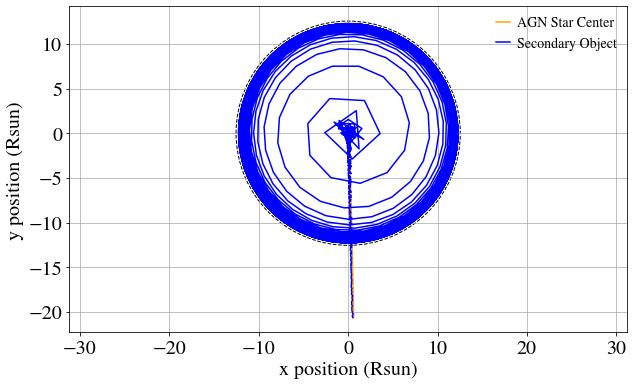

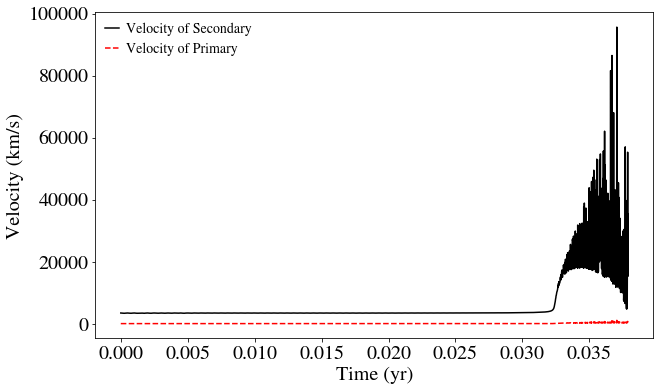

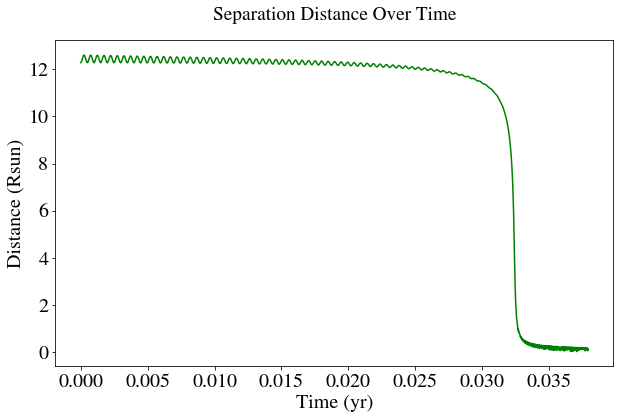

In [75]:
plot_simulation_results(positions, times, v_1, v_2, R_1)

In [ ]:
Sim_no_var_g = positions, times, v_1_magnitude, v_2_magnitude, R_1

# Orbit Integration: Variable Density and Gravitational Potential

In [229]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

# Assuming rho_star and radius_star are defined and sorted in increasing order
#rho_star_function = interp1d(r_star_stream*c.rsun, rho_star_stream, kind='linear', fill_value="extrapolate")
rho_star_function = interp1d(r_star_stream*c.rsun, rho_star_stream, kind='linear', assume_sorted=True, bounds_error=False, fill_value="extrapolate")
mass_star_function = interp1d(r_star_stream*c.rsun, mass_star_stream, kind='linear', assume_sorted=True, bounds_error=False, fill_value="extrapolate")



def run_simulation():
    start_time = time.time()  # Record the start time
    # Constants
    au = 1.496e13  # Astronomical Unit in cm
    start = r_star_stream[550] * c.rsun  # Starting position
    
    # Masses and radii
    M_1 = M * c.msun  # Mass of the first object
    M_2 = 10 * c.msun  # Mass of the second object
    R_1 = r_star[0] * c.rsun  # Radius of the first object
    R_2 = (2.0 * c.G * M_2) / (c.c ** 2.0)  # Schwarzschild radius for the second object
    
    # Drag force parameters
    C_d = 0.8  # Drag coefficient
    A = np.pi * R_2 ** 2.0  # Cross-sectional area

    # Time span for the integration
    t_start = 0
    #t_end = 1.50 * 3.15e7  # Simulation end time
    t_end = 1.50 * 3.15e6  # Simulation end time
    num_points = 10000
    t_eval = np.linspace(t_start, t_end, num_points)
    
    # Set checkpoints for progress update
    num_checkpoints = 100  # Number of checkpoints for progress updates
    checkpoint_interval = (t_end - t_start) / num_checkpoints

    # Function to calculate Bondi-Hoyle radius
    def bh_radius(M, Vrel):
        return (2.0 * c.G * M) / (Vrel ** 2.0)

    # Equations of motion
    def equations_of_motion(t, y):
        
        # Unpack the state vector
        RR_1, RR_2, v_1, v_2 = y[:2], y[2:4], y[4:6], y[6:]
        R = RR_2 - RR_1
        distance = np.linalg.norm(R)
        
        #print('distance, R_1:' distance,R_1 )
        if distance < R_1:
            M_r = mass_star_function(distance)
            effective_mass_M1 = M_r
        else:
            effective_mass_M1 = M_1

        # Gravitational force and acceleration
        force = c.G * M_1 * M_2 / distance ** 2
        acc_1 = force * R / (distance * M_1)
        acc_2 = -force * R / (distance * M_2)

        # Drag force
        v_2_mag = np.linalg.norm(v_2)
        v_2_hat = v_2 / v_2_mag
        current_rho = rho_star_function(distance)
        bh_r = bh_radius(M_2, v_2_mag)
        A_bh = np.pi * bh_r ** 2
        Area = max(A, A_bh)
        F_drag = -0.5 * C_d * current_rho * Area * v_2_mag ** 2 * v_2_hat
        acc_drag = F_drag / M_2
        acc_2 += acc_drag
        
            
        return np.concatenate((v_1, v_2, acc_1, acc_2))

    # Collision event function
    def collision_event(t, y):
        r_1, r_2 = y[:2], y[2:4]
        distance = np.linalg.norm(r_2 - r_1)
        collision_distance = 1e6  # Collision threshold
        return distance - collision_distance
    
    collision_event.terminal = True
    collision_event.direction = -1

    # Initial state vector
    r_1_initial = np.array([0.0, 0.0])  # Star initial position
    r_2_initial = np.array([start, 0.0])  # Planet initial position
    v_2_initial_mag = np.sqrt(c.G * M_1 / np.linalg.norm(r_2_initial - r_1_initial))
    v_1_initial = M_2 / M_1 * v_2_initial_mag * (r_2_initial - r_1_initial) / np.linalg.norm(r_2_initial - r_1_initial)
    v_2_initial = v_2_initial_mag * (r_1_initial - r_2_initial) / np.linalg.norm(r_1_initial - r_2_initial)
    v_1_initial = v_1_initial[::-1]
    v_2_initial = v_2_initial[::-1]
    initial_state = np.concatenate((r_1_initial, r_2_initial, v_1_initial, v_2_initial))

    # Solve the equations of motion
    solution = solve_ivp(equations_of_motion, [t_start, t_end], initial_state, method='RK45', t_eval=t_eval, atol=1e-8, rtol=1e-8, events=collision_event)

    # Extract and process results
    times = solution.t
    positions = solution.y.T

    if solution.status == 1:
        print(f"Collision event occurred at t = {solution.t_events[0][0] / 3.15e7} years.")
    else:
        print("No collision event occurred within the integration time span.")
    
    # Calculate velocity magnitudes 
    v_1_magnitude = np.sqrt(solution.y[4] ** 2 + solution.y[5] ** 2)
    v_2_magnitude = np.sqrt(solution.y[6] ** 2 + solution.y[7] ** 2)
    
    
    return solution.y.T, solution.t, v_1_magnitude, v_2_magnitude, R_1
    

In [230]:
positions, times, v_1, v_2, R_1 = run_simulation()

No collision event occurred within the integration time span.


In [333]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import gridspec
import numpy as np

def plot_simulation_results(positions, times, v_1_magnitude, v_2_magnitude, R_1):
   

    # Create figure and gridspec layout
        
    fig = plt.figure(figsize=(10, 12))
    gs = gridspec.GridSpec(3, 1, height_ratios=[2, 0.8, 0.8],hspace = 0.3)

    # Trajectory plot (top large panel)
    ax0 = plt.subplot(gs[0])
    ax0.plot(positions[:, 0] / c.rsun, positions[:, 1] / c.rsun, label='AGN Star Center', linestyle='-', color='orange')
    ax0.plot(positions[:, 2] / c.rsun, positions[:, 3] / c.rsun, label='Secondary Object', linestyle='-', color='blue')
    circle = patches.Circle((0.0, 0.0), R_1 / c.rsun, edgecolor='black', facecolor='none', linestyle='--')
    ax0.add_patch(circle)
    ax0.set_xlabel('x position (Rsun)')
    ax0.set_ylabel('y position (Rsun)')
    ax0.legend()
    ax0.grid(True)
    ax0.axis('equal')
    ax0.set_title('Trajectory')

    

    # Trajectory plot (top large panel)
   # ax0 = plt.subplot(gs[0])
   

    # Velocity plot (middle panel, shares x-axis with distance plot)
    ax1 = plt.subplot(gs[1])
    ax1.plot(times / c.yr, v_2_magnitude / 1e5, label='Velocity of Secondary', linestyle='-', color='black')
    ax1.plot(times / c.yr, v_1_magnitude / 1e5, label='Velocity of Primary', linestyle='--', color='red')
    ax1.set_ylabel('Velocity (km/s)')
    # Remove x-axis label from ax1 to share with ax2
    # ax1.set_xlabel('Time (yr)')
    ax1.legend()
    ax1.grid(True)

    # Distance plot (bottom panel, shares x-axis with velocity plot)
    ax2 = plt.subplot(gs[2], sharex=ax1)
    x1, y1 = positions[:, 0], positions[:, 1]
    x2, y2 = positions[:, 2], positions[:, 3]
    delta = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    ax2.plot(times / c.yr, delta / c.rsun, linestyle='-', color='green')
    ax2.set_ylabel('Distance (Rsun)')
    ax2.set_xlabel('Time (yr)')
   # ax2.set_title('Separation Distance')
    ax2.grid(True)

    # Hide x-axis label & ticklabels of ax1, since ax2 will share the same x-axis
    plt.setp(ax1.get_xticklabels(), visible=False)
    
    # This adjusts subplots using subplots_adjust
    #plt.subplots_adjust(hspace=0)  # Adjusts the space between the plots
    
    # Adjust subplot positions to control spacing manually
    ax1_pos = ax1.get_position()  # Get the bounding box of ax1 in figure coordinates
    ax2_pos = ax2.get_position()  # Get the bounding box of ax2 in figure coordinates
    # Set the top of ax2's bounding box to match the bottom of ax1's bounding box (to attach ax1 and ax2 visually)
    ax2.set_position([ax2_pos.x0, ax1_pos.y0 - ax2_pos.height, ax2_pos.width, ax2_pos.height])

    #plt.tight_layout()
    plt.show()

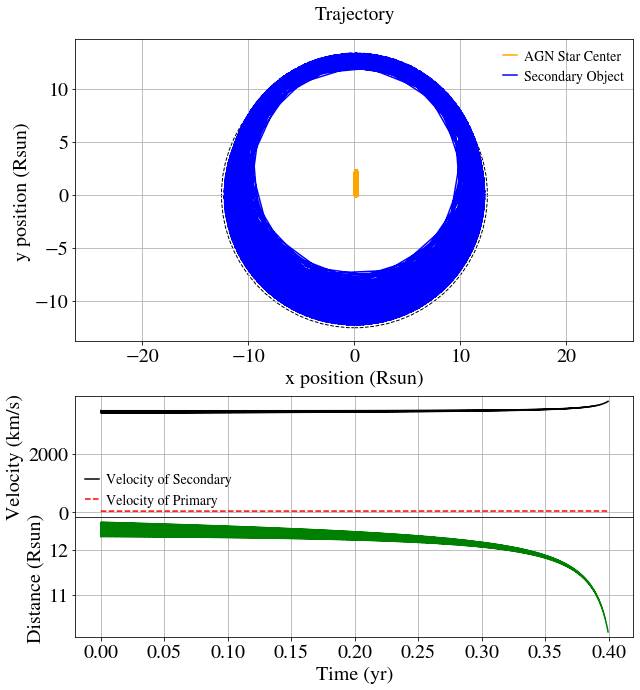

In [334]:
plot_simulation_results(positions, times, v_1, v_2, R_1)

## Implement Checkpoints to see Computation Progress

In [410]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
import time


# These are functions that interpolate mass and density across AGN star and stream. These are global functions 
rho_star_function = interp1d(r_star_stream*c.rsun, rho_star_stream, kind='linear', assume_sorted=True, bounds_error=False, fill_value="extrapolate")
mass_star_function = interp1d(r_star_stream*c.rsun, mass_star_stream, kind='linear', assume_sorted=True, bounds_error=False, fill_value="extrapolate")


# Function to calculate Bondi-Hoyle radius
def bh_radius(M, Vrel):
    return (2.0 * c.G * M) / (Vrel ** 2.0)

# Equations of motion
def equations_of_motion(t, y, M_1, M_2, R_1, R_2, C_d):

    # Unpack the state vector
    RR_1, RR_2, v_1, v_2 = y[:2], y[2:4], y[4:6], y[6:]
    R = RR_2 - RR_1
    distance = np.linalg.norm(R)
                                                                           
                                                                           
    #print('distance, R_1:' distance,R_1 )
    if distance < R_1:
        M_r = mass_star_function(distance)
        effective_mass_M1 = M_r
    else:
        effective_mass_M1 = M_1

    # Gravitational force and acceleration
    force = c.G * M_1 * M_2 / distance ** 2
    acc_1 = force * R / (distance * M_1)
    acc_2 = -force * R / (distance * M_2)

    # Drag force
    v_2_mag = np.linalg.norm(v_2)
    v_2_hat = v_2 / v_2_mag
    current_rho = rho_star_function(distance)
    bh_r = bh_radius(M_2, v_2_mag)
    A_bh = np.pi * bh_r ** 2
    A = np.pi * R_2 ** 2.0  # Cross-sectional area                                                                        
    Area = max(A, A_bh)
    F_drag = -0.5 * C_d * current_rho * Area * v_2_mag ** 2 * v_2_hat
    acc_drag = F_drag / M_2
    acc_2 += acc_drag

    return np.concatenate((v_1, v_2, acc_1, acc_2))

# Collision event function

def collision_event(t, y, *args):
    r_1, r_2 = y[:2], y[2:4]
    distance = np.linalg.norm(r_2 - r_1)
    collision_distance = 0.001*c.rsun  # Collision threshold
    return distance - collision_distance

    
def run_simulation_with_checkpoints():
    start_time = time.time()  # Record the start time
    
    # Initialize empty arrays or lists to store the full solution and time points
    full_solution = np.empty((0, 8))  # Assuming your system has 8 components (4 positions and 4 velocities)
    full_time = np.array([])
    
    # Constants
    au = 1.496e13  # Astronomical Unit in cm
    start = r_star_stream[550] * c.rsun  # Starting position
    
    # Masses and radii
    M_1 = M * c.msun  # Mass of the first object
    M_2 = 10 * c.msun  # Mass of the second object
    R_1 = r_star[0] * c.rsun  # Radius of the first object
    R_2 = (2.0 * c.G * M_2) / (c.c ** 2.0)  # Schwarzschild radius for the second object
    
    # Drag force parameters
    C_d = 0.8  # Drag coefficient

    # Constants and initial setup
    # Define all necessary constants and variables here
    t_start = 0
    t_end =  0.5 * 3.15e7  # Example: Simulation end time
    num_points = 20000   # Resolution points at which we save the data
    num_checkpoints = 100 # Number of checkpoints in the simulation
    t_eval_global = np.linspace(t_start, t_end, num_points)
    checkpoint_indices = np.array_split(np.arange(num_points), num_checkpoints)
    
    # Initial state vector
    r_1_initial = np.array([0.0, 0.0])  # Star initial position
    r_2_initial = np.array([start, 0.0])  # Secondary initial position
    v_2_initial_mag = np.sqrt(c.G * M_1 / np.linalg.norm(r_2_initial - r_1_initial))
    v_1_initial = M_2 / M_1 * v_2_initial_mag * (r_2_initial - r_1_initial) / np.linalg.norm(r_2_initial - r_1_initial)
    v_2_initial = v_2_initial_mag * (r_1_initial - r_2_initial) / np.linalg.norm(r_1_initial - r_2_initial)
    v_1_initial = v_1_initial[::-1]
    v_2_initial = v_2_initial[::-1]
    initial_state = np.concatenate((r_1_initial, r_2_initial, v_1_initial, v_2_initial))
    
    
    progress_updates = []

    for i, indices in enumerate(checkpoint_indices):
        # Define the time span for this segment
        if i == 0:
            # For the first checkpoint, use the initial state
            initial_state_segment = initial_state
        else:
            # For subsequent checkpoints, use the last state from the previous segment
            initial_state_segment = solution.y[:, -1]

        t_eval_segment = t_eval_global[indices[0]:indices[-1]+1]
        t_span_segment = [t_eval_segment[0], t_eval_segment[-1]]
        
        
        # Options for collision event conditions 
        collision_event.terminal = True
        collision_event.direction = -1
    
        # Solve the equations of motion for this segment # events=collision_event,
        #solution = solve_ivp(equations_of_motion, t_span_segment, initial_state_segment, method='RK45', t_eval=t_eval_segment,events=collision_event, atol=1e-10, rtol=1e-10, args=(M_1, M_2, R_1, R_2, C_d))
        # LSODA switches automatically between nonstiff (Adams) and stiff (BDF - Backward Differentiation Formula) methods. It can be a good choice if you're unsure whether your system is stiff or not
        # as it adjusts its algorithm based on the problem's stiffness characteristics at runtime
        solution = solve_ivp(equations_of_motion, t_span_segment, initial_state_segment, method='LSODA', t_eval=t_eval_segment,events=collision_event, atol=1e-6, rtol=1e-9, args=(M_1, M_2, R_1, R_2, C_d))
        # rtol=1e-6 to 1e-8 and atol=1e-9 to 1e-12
        
         # Concatenate this segment's solution to the full solution
        full_solution = np.vstack((full_solution, solution.y.T))
        full_time = np.concatenate((full_time, solution.t))

        # Progress update
        elapsed_time = time.time() - start_time
        progress_percentage = (i + 1) / num_checkpoints * 100
       
        # Within the loop, replace the progress_updates.append(...) line with this:
        print(f"Checkpoint {i + 1}/{num_checkpoints}. Progress: {progress_percentage}%. Elapsed time: {elapsed_time:.2f}s.", end='\r')
        
        if solution.status == 1:
            print(f"Collision event occurred at t = {solution.t_events[0][0]} seconds.")
            break  # Exit the loop if the collision event is terminal
    
    # Finalize and print progress updates
    for update in progress_updates:
        print(update)
    
    print()  # Ensure there's a newline after the last progress update
    total_elapsed_time = time.time() - start_time
    print(f"\nSimulation completed in {total_elapsed_time:.2f} seconds.")
    
    
    # Calculate velocity magnitudes and return relevant data
    #v_1_magnitude = np.sqrt(solution.y[4] ** 2 + solution.y[5] ** 2)
    #v_2_magnitude = np.sqrt(solution.y[6] ** 2 + solution.y[7] ** 2)
    # Calculate velocity magnitudes from the full solution
    v_1_magnitude = np.sqrt(full_solution[:, 4] ** 2 + full_solution[:, 5] ** 2)
    v_2_magnitude = np.sqrt(full_solution[:, 6] ** 2 + full_solution[:, 7] ** 2)
    
    return full_solution, full_time, v_1_magnitude, v_2_magnitude, R_1

In [411]:
positions, times, v_1, v_2, R_1 = run_simulation_with_checkpoints()

Checkpoint 100/100. Progress: 100.0%. Elapsed time: 4699.45s.: 15.91s.

Simulation completed in 4699.45 seconds.


In [413]:
import pickle
M_1 = M * c.msun  # Mass of the first object
M_2 = 10 * c.msun  # Mass of the second object
R_1 = r_star[0] * c.rsun  # Radius of the first object
R_2 = (2.0 * c.G * M_2) / (c.c ** 2.0)  # Schwarzschild radius for the second object
    
# Drag force parameters
C_d = 0.8  # Drag coefficient

t_start = 0
t_end =  0.5 * 3.15e7  # Example: Simulation end time
num_points = 20000   # Resolution points at which we save the data
num_checkpoints = 100 # Number of checkpoints in the simulation
    
execution_time = 4699.45     
method='LSODA'
atol=1e-6
rtol=1e-9

# Saving the objects:

with open('simulation_LSODA.pkl', 'wb') as f:  # Note 'wb' for write binary
    pickle.dump([positions, times, v_1, v_2, R_1, R_2, M_1, M_2, C_d, t_start, t_end, num_points, method, atol, rtol, execution_time], f)

#LSODA
# Getting back the objects:
#with open('simulation_RK45.pkl', 'rb') as f:  # Note 'rb' for read binary
#    positions, times, v_1, v_2, R_1, R_2, M_1, M_2, C_d, t_start, t_end, num_points, method, atol, rtol, execution_time = pickle.load(f)

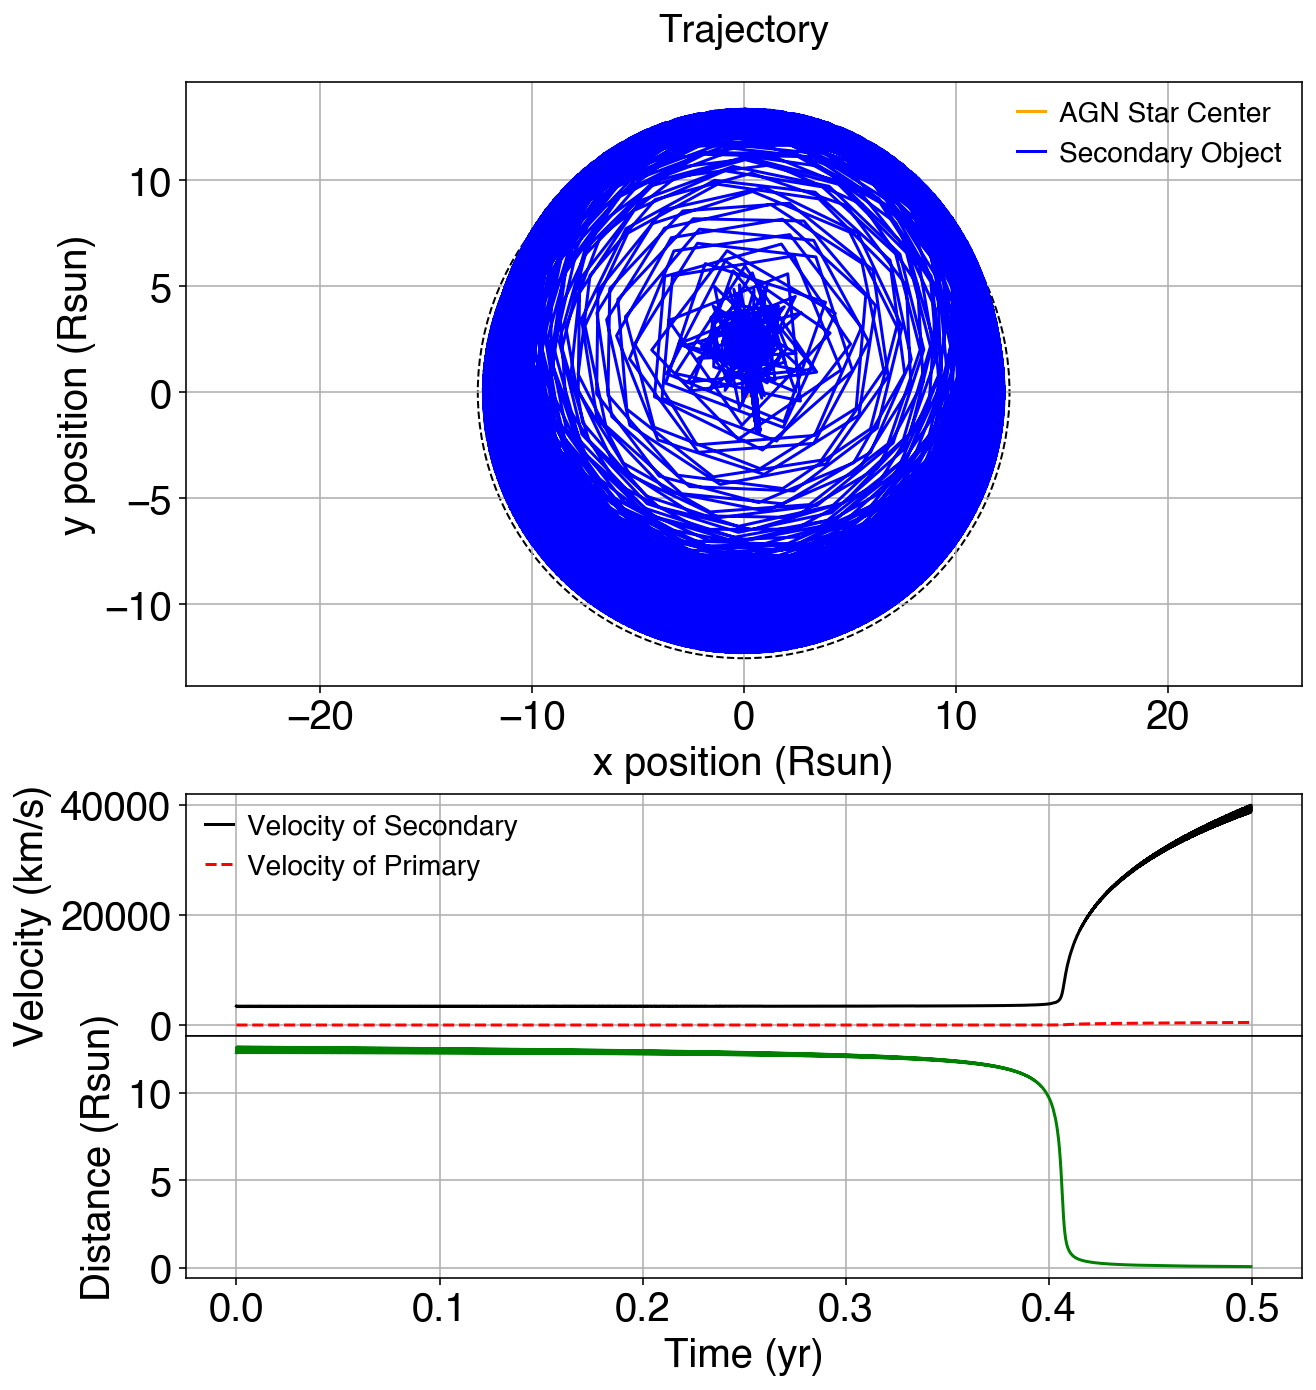

In [393]:
plot_simulation_results(positions, times, v_1, v_2, R_1)

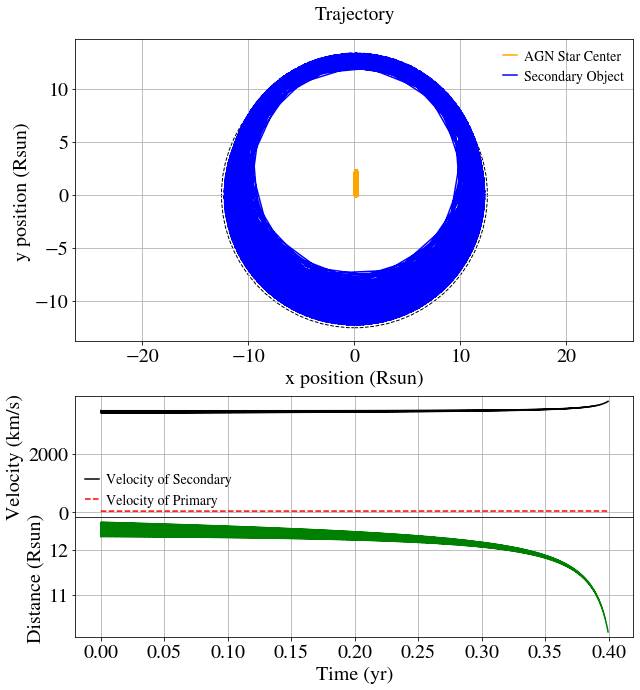

In [332]:
plot_simulation_results(positions, times, v_1, v_2, R_1)

## Calculate GW Emission

In [414]:
import numpy as np

d_obs = 3e25  # ~10Mpc, closest AGNs.  Observer distance in meters, example value, adjust as needed
M_2 = 10 * c.msun  # Mass of the second object

def calculate_gw_signals(positions, times, v_1_magnitude, v_2_magnitude, M_2, mass_star_function):
    # Calculate separation distance at each time step
    x1, y1 = positions[:, 0], positions[:, 1]
    x2, y2 = positions[:, 2], positions[:, 3]
    separation_distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    
    # Calculate the system's total mass over time using the mass_star_function
    M_r = mass_star_function(separation_distance)  # Mass of the star at each timestep
    M_total = M_2 + M_r
    
    # Calculate the orbital frequency at each timestep assuming circular orbit
    f_orb = 1 / (2 * np.pi) * np.sqrt(c.G * M_total / separation_distance**3)
    
    # Calculate the GW frequency, which is twice the orbital frequency
    f_gw = 2 * f_orb
    
    # Calculate the chirp mass
    M_chirp = (M_2 * M_r)**(3/5) / (M_total)**(1/5)
    
    # Calculate the GW amplitude
    h = (4 / d_obs) * (c.G * M_chirp / c.c**2) * (np.pi * f_gw * c.G * M_chirp / c.c**3)**(2.0/3.0)
    
    return f_gw, h

# Note: Ensure positions, times, v_1_magnitude, v_2_magnitude, and M_2 are defined based on your simulation data.
# mass_star_function should be a function that returns the mass of the star given a separation distance.
# Example call to the function (you need to define the input parameters based on your simulation results):
# f_gw, h = calculate_gw_signals(positions, times, v_1_magnitude, v_2_magnitude, M_2, mass_star_function)


In [415]:
f_gw,h = calculate_gw_signals(positions, times, v_1_magnitude, v_2_magnitude, M_2, mass_star_function)

7733.04719820857


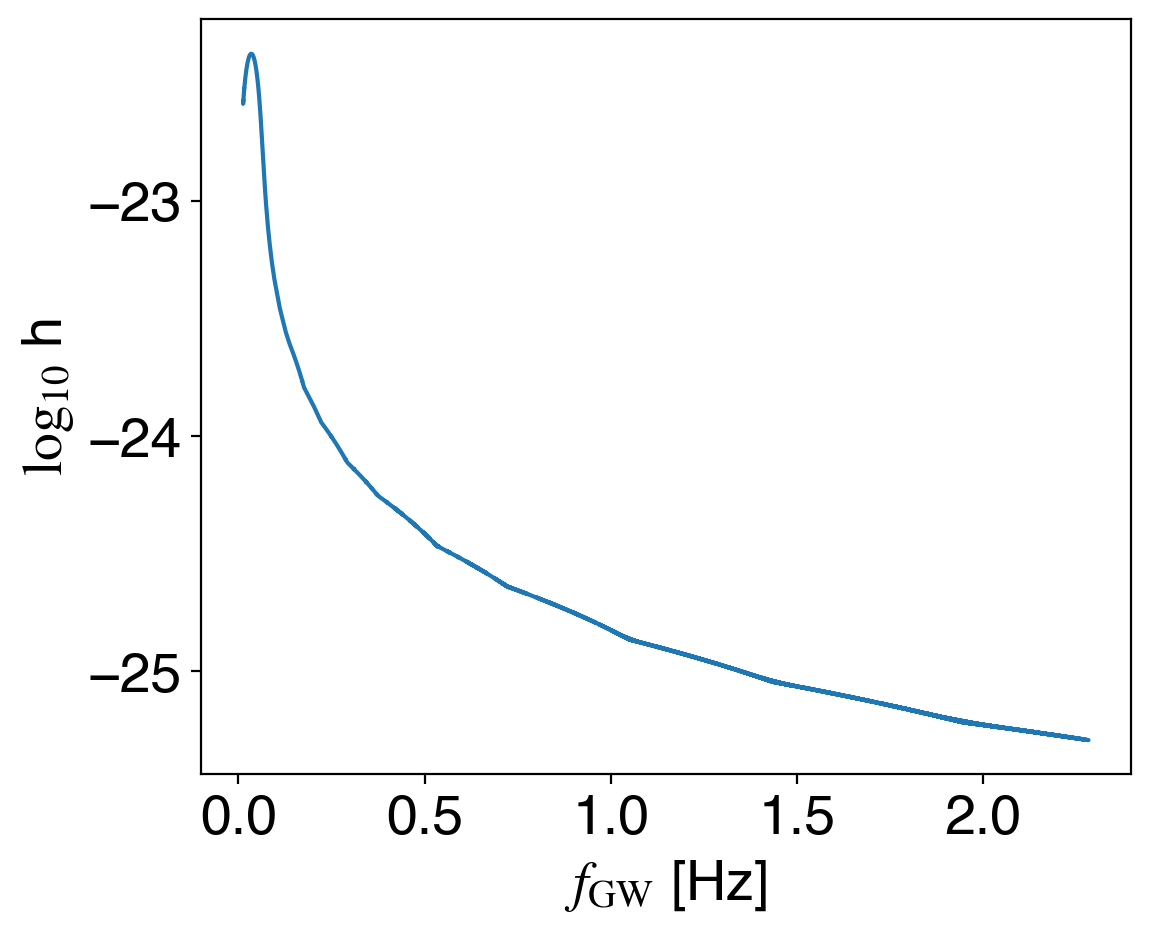

In [416]:

plt.rcParams['figure.figsize'] = (6,5)
fig, axis = plt.subplots(dpi=100)
axis.cla() # Clear Axis
axis.plot(f_gw/0.01,np.log10(h))
#axis.plot(p.logR,p.logT)
axis.set_xlabel(r"$f_{\rm GW}$ [Hz]")
axis.set_ylabel(r"$\log_{10}$ h")
print(T_stream_scaled[-1])

In [417]:
## Using https://github.com/eXtremeGravityInstitute/LISA_Sensitivity/blob/master/LISA.py 
## Credits: https://www.montana.edu/xgi/people.html 

import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({
"text.usetex": False,
"font.family": "sans-serif",
"font.sans-serif": ["Helvetica"]})

import PhenomA as pa
import LISA as li
import WaveformTools as wt

Text(76.0, 0.5, '$\\log_{10}$ h')

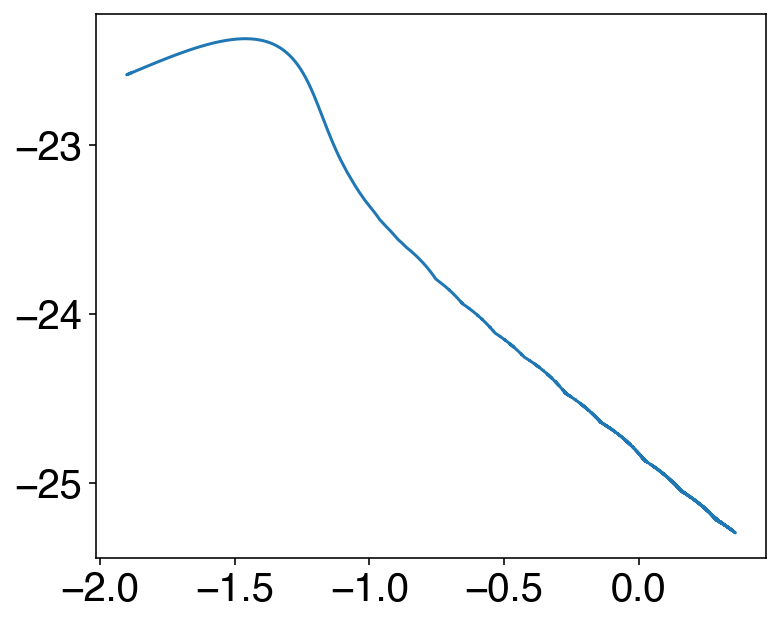

In [420]:
# create LISA object
lisa = li.LISA() 

# Plot LISA's sensitivity curve
f  = np.logspace(np.log10(1.0e-5), np.log10(1.0e0), 1000)
Sn = lisa.Sn(f)

#li.PlotSensitivityCurve(f, Sn) # provide additional argument, e.g. 'SensitivityCurve.pdf', to save figure
plt.plot(np.log10(f_gw/0.01),np.log10(h))


## Compare to LISA Sensitivity 

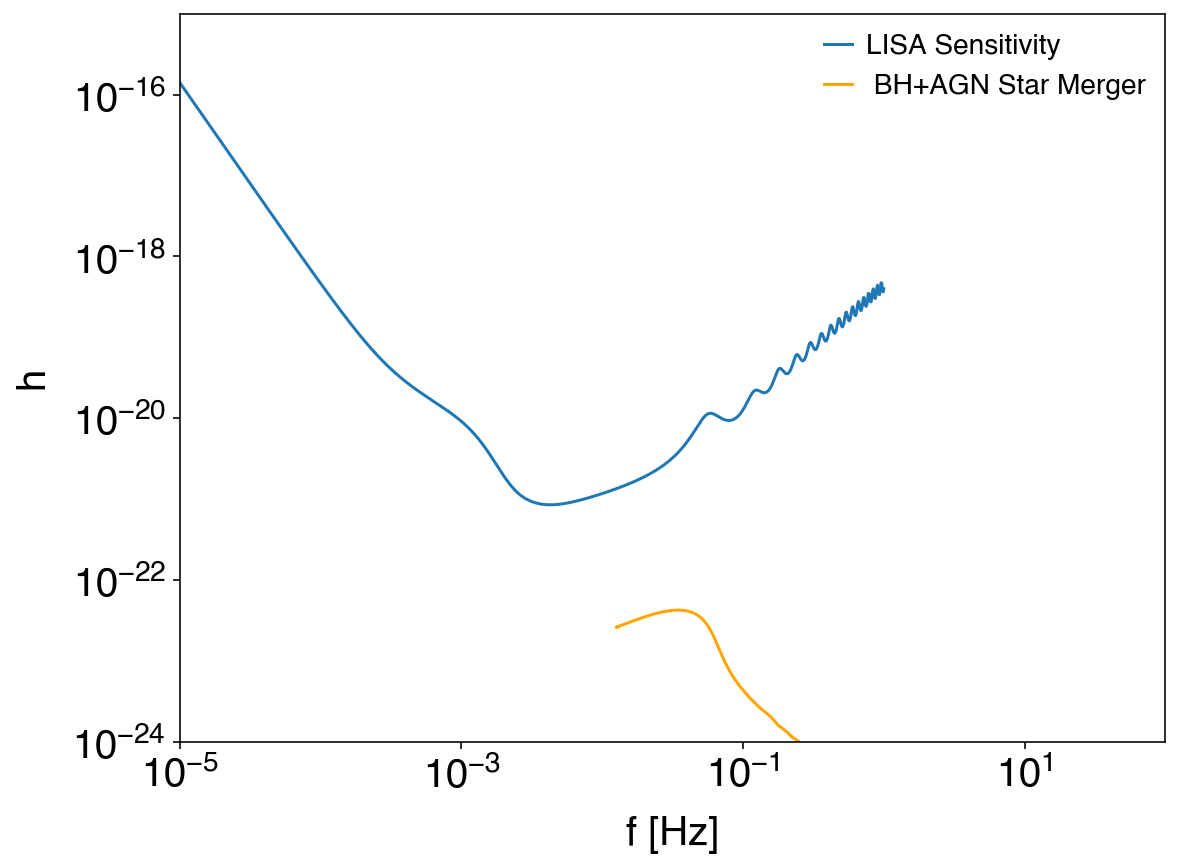

In [419]:
import PhenomA as pa

fig, ax = plt.subplots(1, figsize=(8,6))
plt.tight_layout()

ax.set_xlabel(r'f [Hz]', fontsize=20, labelpad=10)
ax.set_ylabel(r'h', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.set_xlim(1.0e-5, 100.0e0)
ax.set_ylim(1.0e-24, 1.0e-15)

ax.loglog(f, np.sqrt(f*Sn),label = 'LISA Sensitivity') # plot the characteristic strain
ax.loglog(f_gw/0.01,h,color ='orange', label=' BH+AGN Star Merger')
ax.legend()
plt.show()
    
   

## Things to do:
- Include GW radiation (in Post-Newtonian Approximation)
- Calculate velocity profile in the accretion stream. Make a nice visualization of properties of star+stream (rho, cs, mass, velocity)
- Implement accretion (first calculate and store Mdot_bhl). We'll use it in postprocess to compare to binding energies etc
- Calculate inspiral in the accretion stream. Timescale likely very long, but need to include the advection term (see velocity in accretion stream)
- Modularize code. Optimize

### Orbital evolution due to gravitational wave radiation within the Post-Newtonian (PN) approximation.

The rate of orbital separation decrease due to gravitational wave emission can be effectively described by the quadrupole formula, which is a first-order approximation in the PN framework. For a binary system comprising two masses, $m_1$ and $m_2$, in a circular orbit, the rate of change of the orbital separation \(r\) can be expressed as:


$\frac{dr}{dt} = -\frac{64}{5} \frac{G^3 m_1 m_2 (m_1 + m_2)}{c^5 r^3}$


where:
- \(G\) is the gravitational constant,
- \(c\) is the speed of light,
- \(r\) is the separation distance between the two masses.

For more accurate and detailed modeling, especially closer to the merger phase, higher-order PN corrections and potentially numerical relativity simulations may be required to capture the full complexity of the system's dynamics.

## Test code by simulating a LIGO BH Merger

In [563]:
from scipy.integrate import solve_ivp
import numpy as np


# Masses (example values)
m1 = 36.0*c.msun   
m2 = 29.0*c.msun   

#Dl = 410.*wt.MPC
#T_merge = 5.*li.YEAR

def equations_of_motion(t, y):
    # Unpack the current state
    r = y[0]  # Current separation distance
    
    # Calculate the rate of change of r due to GW radiation
    dr_dt = -64/5 * c.G**3 * m1 * m2 * (m1 + m2) / (c.c**5 * r**3)
    
    # If you have other differential equations describing your system, they would be included here
    # For example, if you're modeling the velocities or other parameters, you'd return their rates of change as well
    
    return [dr_dt]

# Initial conditions
r_initial = 1e9  # Initial separation distance in cm, example value
initial_state = [r_initial]

# Time span for the simulation
t_span = (0, 9e5)  # Example: from 0 to 10 million seconds
t_eval = np.linspace(t_span[0], t_span[1], 100000)  # Evaluation times

# Solve the system
solution = solve_ivp(equations_of_motion, t_span, initial_state, method='RK45', t_eval=t_eval)

# Extracting the solution
positions = solution.y[0]
times = solution.t

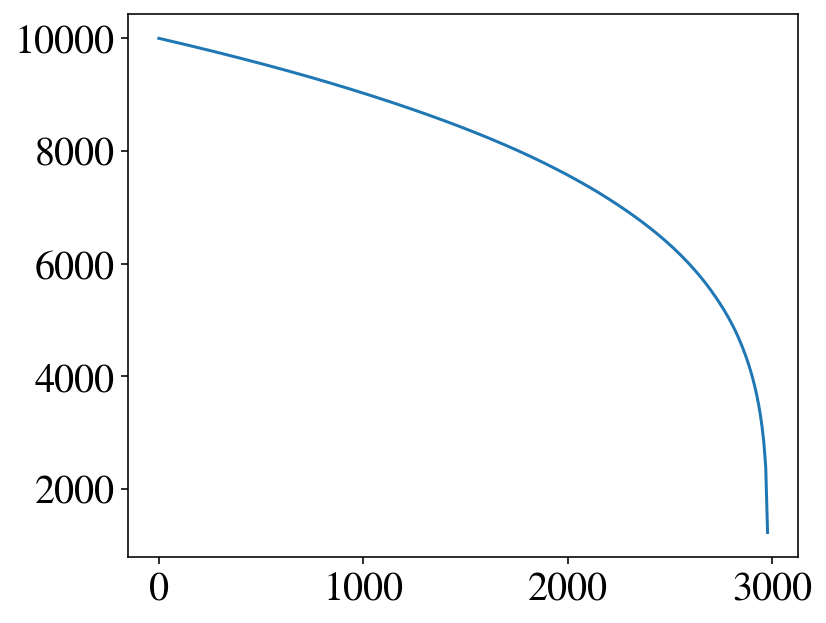

In [564]:
plt.plot(times,positions/1e5)

In [546]:
import numpy as np

d_obs = 1.265e+27  # ~410Mpc 

M_1 = m1
M_2 = m2 

def calculate_gw_signals(positions, times, M_1, M_2):
    # Calculate separation distance at each time step
    x1, y1 = positions[:, 0], positions[:, 1]
    x2, y2 = positions[:, 2], positions[:, 3]
    separation_distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    
   
    M_total = M_1 + M_2
    
    # Calculate the orbital frequency at each timestep assuming circular orbit
    f_orb = 1 / (2 * np.pi) * np.sqrt(c.G * M_total / separation_distance**3)
    
    # Calculate the GW frequency, which is twice the orbital frequency
    f_gw = 2 * f_orb
    
    # Calculate the chirp mass
    M_chirp = (M_1 * M_2)**(3/5) / (M_total)**(1/5)
    
    # Calculate the GW amplitude
    h = (4 / d_obs) * (c.G * M_chirp / c.c**2) * (np.pi * f_gw * c.G * M_chirp / c.c**3)**(2.0/3.0)
    
    return f_gw, h

# Note: Ensure positions, times, v_1_magnitude, v_2_magnitude, and M_2 are defined based on your simulation data.
# mass_star_function should be a function that returns the mass of the star given a separation distance.
# Example call to the function (you need to define the input parameters based on your simulation results):
# f_gw, h = calculate_gw_signals(positions, times, v_1_magnitude, v_2_magnitude, M_2, mass_star_function)


In [547]:

f_gw, h = calculate_gw_signals(positions, times, M_1, M_2)

plt.rcParams['figure.figsize'] = (6,5)
fig, axis = plt.subplots(dpi=100)
axis.cla() # Clear Axis
axis.plot(f_gw/0.01,np.log10(h))
#axis.plot(p.logR,p.logT)
axis.set_xlabel(r"$f_{\rm GW}$ [Hz]")
axis.set_ylabel(r"$\log_{10}$ h")
print(T_stream_scaled[-1])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
plot.plt(separation_distance,)